# 팀원명단(학과,학번,이름)
### 경영학과 2020-29727 문승현
### 지리학과 2020-10226 염수민
### 간호학과 2017-12800 민현지
### 경영학과 2017-17345 염승준
### 간호학과 2015-18034 박광훈


# 주제 : 근로소득으로 서울시에서 집을 사는 것, 과연 가능할까?

# 기본 설정 하기

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

데이터 분석에 앞서 폰트 설정을 진행하였다.

In [9]:
### Windows용 font 설정 ###
fm.get_fontconfig_fonts()
font_location = 'C:\\Windows\\Fonts\\malgun.ttf' 
font_name = fm.FontProperties(fname=font_location, size=10).get_name()
rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus']=False

### Mac용 font 설정 ###
# rc('font', family='AppleGothic') 
# plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
서울시 공공 데이터에서 얻은 2016~2020년 부동산 가격 정보 자료를 property라는 변수에 연도별로 구분하여 담았다.

In [8]:
property16 = pd.read_csv('Seoul_2016.csv', usecols = [3, 6, 15, 16], encoding='utf-8')
property17 = pd.read_csv('Seoul_2017.csv', usecols = [3, 6, 15, 16], encoding='utf-8')
property18 = pd.read_csv('Seoul_2018.csv', usecols = [3, 6, 15, 16], encoding='utf-8')
property19 = pd.read_csv('Seoul_2019.csv', usecols = [3, 6, 15, 16], encoding='utf-8')
property20 = pd.read_csv('Seoul_2020.csv', usecols = [3, 6, 15, 16], encoding='euc-kr')

# 데이터 결합하기
2016~2020년 부동산 가격 정보 자료를 종합하여 property_all이라는 변수에 담았다.

In [9]:
property_all = pd.concat([property16,property17,property18,property19,property20],ignore_index=True)
property_all

,자치구명,신고년도,건물주용도,물건금액
0,중랑구,2016,단독주택,352000000
1,영등포구,2016,아파트,450000000
2,동작구,2016,단독주택,874000000
3,영등포구,2016,아파트,500000000
4,노원구,2016,아파트,241000000
...,...,...,...,...
776358,강동구,2020,아파트,547000000
776359,강동구,2020,아파트,658000000
776360,강동구,2020,연립주택,215000000
776361,관악구,2020,단독주택,455000000


# 연도 별 평균 부동산 금액 구하기
부동산 가격 정보 자료를 '신고년도'별로 구분하여 부동산 물건금액의 '평균'을 구하였다.

In [10]:
group_gu_all=property_all.groupby(['신고년도']).mean().astype(int)
group_gu_all

,물건금액
신고년도,
2016,457960511
2017,508929164
2018,549348740
2019,622549442
2020,576351459


x축을 '신고년도' y축을 '물건금액'으로 하는 막대그래프를 이용하여 데이터를 시각화 하였다.

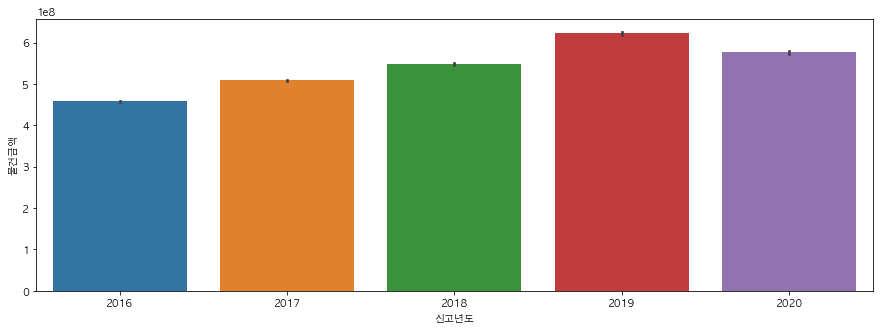

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x='신고년도', y='물건금액', data=property_all)
plt.show()

# 연도 별 평균 부동산 금액 상승률 구하기
연도 별 평균 부동산 금액 상승률을 구하기 위해, 두 개의 dataframe(prelist, postlist)을 만들었다.
이후, for 중첩문을 황용하여 두 개의 dataframe에서 데이터를 추출, 평균 부동산 금액 상승률을 계산하였다. 

In [27]:
prelist=[group_gu_all.iloc[0],group_gu_all.iloc[1],group_gu_all.iloc[2],group_gu_all.iloc[3]]
postlist=[group_gu_all.iloc[1],group_gu_all.iloc[2],group_gu_all.iloc[3],group_gu_all.iloc[4]]
results=[]
for x,y in zip(prelist,postlist):
    newresult=[]
    for i in range(len(group_gu_all.iloc[0])):
        pre=x.iloc[i]
        post=y.iloc[i]
        result=f'{round((post-pre)/pre*100,1)}%'
        newresult.append(result)
    results.append(newresult)

print(results)

[['11.1%'], ['7.9%'], ['13.3%'], ['-7.4%']]


위에서 구한 연도 별 평균 부동산 금액을 이용하여 새로운 index를 'year'로, columns를 'rate'로 하는 dataframe을 만들었다.

In [35]:
rate=['부동산 금액 상승률(평균, %)']
year=['16->17년','17->18년','18->19년','19->20년']
gu_rate=pd.DataFrame(results,index=year, columns=rate)
gu_rate

,"부동산 금액 상승률(평균, %)"
16->17년,11.1%
17->18년,7.9%
18->19년,13.3%
19->20년,-7.4%


# 연도 별 자치구, 건물주용도, 부동산 물건금액 확인하기

서울시 공공데이터에서 얻은 2016년부터 2020년까지 부동산 자료를 필요한 부분만 불러왔고, 잘 수행되었는지 첫 5개의 데이터 출력을 통해 확인했다.

In [2]:
import pandas as pd
property16 = pd.read_csv(r'C:\data\Seoul_2016.csv', usecols = [3, 6, 15, 16], encoding='utf-8')
property16.head(5)

,자치구명,신고년도,건물주용도,물건금액
0,중랑구,2016,단독주택,352000000
1,영등포구,2016,아파트,450000000
2,동작구,2016,단독주택,874000000
3,영등포구,2016,아파트,500000000
4,노원구,2016,아파트,241000000


In [3]:
import pandas as pd
property17 = pd.read_csv(r'C:\data\Seoul_2017.csv', usecols = [3, 6, 15, 16], encoding='utf-8')
property17.head(5)

,자치구명,신고년도,건물주용도,물건금액
0,용산구,2017,아파트,881400000
1,동대문구,2017,아파트,597000000
2,동대문구,2017,아파트,480300000
3,금천구,2017,아파트,548200000
4,금천구,2017,아파트,500300000


In [4]:
import pandas as pd
property18 = pd.read_csv(r'C:\data\Seoul_2018.csv', usecols = [3, 6, 15, 16], encoding='utf-8')
property18.head(5)

,자치구명,신고년도,건물주용도,물건금액
0,송파구,2018,아파트,410000000
1,노원구,2018,아파트,360000000
2,노원구,2018,아파트,255000000
3,노원구,2018,아파트,370000000
4,노원구,2018,아파트,250000000


In [5]:
import pandas as pd
property19 = pd.read_csv(r'C:\data\Seoul_2019.csv', usecols = [3, 6, 15, 16], encoding='utf-8')
property19.head(5)

,자치구명,신고년도,건물주용도,물건금액
0,중구,2019,아파트,1390000000
1,중구,2019,아파트,950000000
2,중구,2019,아파트,1345000000
3,중구,2019,아파트,1138000000
4,중구,2019,아파트,785000000


In [6]:
import pandas as pd
property20= pd.read_csv(r'C:\data\Seoul_2020.csv', usecols = [3, 6, 15, 16], encoding='euc-kr')
property20.head(5)

,자치구명,신고년도,건물주용도,물건금액
0,종로구,2020,연립주택,200000000
1,종로구,2020,연립주택,119000000
2,종로구,2020,아파트,890000000
3,종로구,2020,아파트,330000000
4,종로구,2020,연립주택,127000000


# 전체 자료에 대한 구별,건물주용도별 물건금액평균

2016년부터 2020년까지의 데이터를 별다른 조작없이 합쳤다.

In [7]:
property_all=pd.concat([property16,property17,property18,property19,property20],ignore_index=True)
property_all

,자치구명,신고년도,건물주용도,물건금액
0,중랑구,2016,단독주택,352000000
1,영등포구,2016,아파트,450000000
2,동작구,2016,단독주택,874000000
3,영등포구,2016,아파트,500000000
4,노원구,2016,아파트,241000000
...,...,...,...,...
776358,강동구,2020,아파트,547000000
776359,강동구,2020,아파트,658000000
776360,강동구,2020,연립주택,215000000
776361,관악구,2020,단독주택,455000000


위의 전체년도 자료를 신고년도와 자치구명을 기준으로 그룹화했고(#1), 신고년도와 건물주용도를 기준으로 그룹화했으며(#2), 신고년도, 자치구, 건물주용도를 순서대로 기준으로 하여 그룹화했다.(#3)

In [8]:
#1
import matplotlib.pyplot as plt
group_gu_all=property_all.groupby(['신고년도','자치구명']).mean().astype(int)
group_gu_all

물건금액
신고년도 자치구명            
2016 강남구    917951082
     강동구    459941043
     강북구    288026592
     강서구    340660552
     관악구    353938649
...               ...
2020 용산구   1019339473
     은평구    385143879
     종로구    586170108
     중구     685148858
     중랑구    431862951

[125 rows x 1 columns]

In [9]:
#2
import matplotlib.pyplot as plt
group_use_all=property_all.groupby(['신고년도','건물주용도']).mean().astype(int)
group_use_all

물건금액
신고년도 건물주용도            
2016 단독주택    735471243
     아파트     546995122
     연립주택    229561951
     오피스텔    210751829
2017 단독주택    805872554
     아파트     614508830
     연립주택    249151505
     오피스텔    224546862
2018 단독주택    962224445
     아파트     670941801
     연립주택    269019089
     오피스텔    248602785
2019 단독주택   1059295124
     아파트     821789511
     연립주택    274359905
     오피스텔    250700320
2020 단독주택   1099598079
     아파트     741247052
     연립주택    279951618
     오피스텔    255299970

In [10]:
#3
import matplotlib.pyplot as plt
group_gu_use_all=property_all.groupby(['신고년도','자치구명','건물주용도']).mean().astype(int)
group_gu_use_all

물건금액
신고년도 자치구명 건물주용도            
2016 강남구  단독주택  -2147483648
          아파트    1077284592
          연립주택    462788061
          오피스텔    288958268
     강동구  단독주택    935788245
...                     ...
2020 중구   오피스텔    291791946
     중랑구  단독주택    812986624
          아파트     474756780
          연립주택    235388085
          오피스텔    191105517

[500 rows x 1 columns]

데이터의 수가 많아 dataframe으로 나타낸 경우 전체를 한눈에 볼 수 없었다. 따라서 이를 seaborn 모듈을 사용해 시각화했다. 자치구별 연도에 따른 물건금액 변화와 건물용도별 연도에 따른 물건금액 변화를 각각 막대그래프로 표현했다.

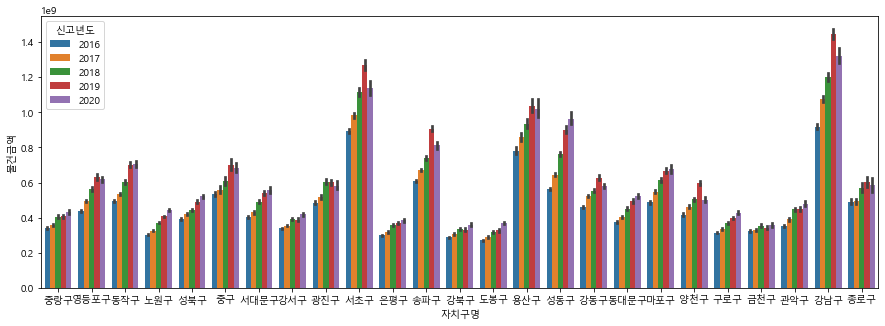

In [12]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.barplot(x='자치구명', y='물건금액', hue='신고년도', data=property_all)
plt.show()

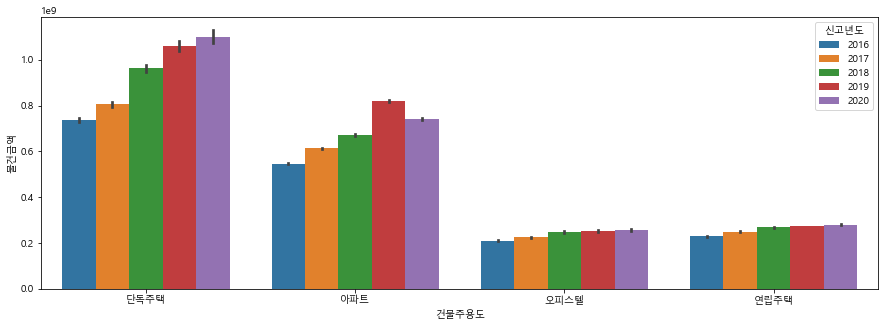

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x='건물주용도', y='물건금액', hue='신고년도', data=property_all)
plt.show()

# 자치구별 물건금액 상승률

우선 자치구별 물건금액 상승률을 연도별로 구해 dataframe으로 만들고, 이를 히트맵으로 시각화했다. 히트맵의 색 차이를 통해 연도별 상승률을 효과적으로 비교할 수 있어서 해당 방법을 선택했다.

In [11]:
#연도별 부동산 자료를 자치구명으로 그룹화해 새로운 변수에 저장
group_gu_16=property16.groupby(['자치구명']).mean().astype(int)
group_gu_17=property17.groupby(['자치구명']).mean().astype(int)
group_gu_18=property18.groupby(['자치구명']).mean().astype(int)
group_gu_19=property19.groupby(['자치구명']).mean().astype(int)
group_gu_20=property20.groupby(['자치구명']).mean().astype(int)

#for 중첩문을 활용해 연도별 금액상승률을 같은 구끼리 매칭해 계산(각 데이터의 구별 순서는 같음)
prelist=[group_gu_16,group_gu_17,group_gu_18,group_gu_19]
postlist=[group_gu_17,group_gu_18,group_gu_19,group_gu_20]
results=[]
for x,y in zip(prelist,postlist):
    newresult=[]
    for i in range(len(group_gu_16)):
        pre=x.iloc[i]
        post=y.iloc[i]
        result=round((post-pre)/pre*100,3)
        newresult.append(result[1])
    results.append(newresult)

print(results)

[[16.868, 13.708, 6.723, 4.191, 10.569, 6.34, 6.385, 1.344, 8.022, 6.746, 7.447, 8.264, 12.5, 6.515, 10.046, 14.384, 7.475, 10.071, 10.78, 12.613, 10.032, 6.362, 0.577, 4.405, 4.434], [11.826, 5.64, 8.607, 10.865, 14.496, 17.001, 10.549, 7.574, 13.334, 10.0, 12.066, 12.741, 12.182, 14.359, 13.296, 18.086, 5.74, 10.223, 8.801, 13.577, 8.714, 12.878, 15.457, 8.507, 13.459], [20.366, 13.669, -0.622, -1.071, 0.649, -0.56, 7.706, -2.837, 10.082, 2.594, 9.218, 16.191, 8.61, 10.216, 14.02, 18.296, 10.126, 22.354, 18.112, 12.112, 10.898, 2.641, 5.808, 15.589, 0.692], [-8.484, -7.368, 8.615, 7.88, 6.521, -3.081, 7.626, 4.501, 9.122, 13.34, 6.447, 0.537, 1.284, 2.511, -10.549, 6.978, 6.274, -10.385, -15.725, -2.099, -1.674, 4.081, -2.798, -2.193, 5.881]]


In [14]:
#list에 저장해둔 상승률들을 dataframe으로 정리
import pandas as pd
gu_names=['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
year=['16->17','17->18','18->19','19->20']
gu_rate=pd.DataFrame(results,index=year, columns=gu_names)
gu_rate

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
16->17,16.868,13.708,6.723,4.191,10.569,6.340,6.385,1.344,8.022,6.746,...,14.384,7.475,10.071,10.780,12.613,10.032,6.362,0.577,4.405,4.434
17->18,11.826,5.640,8.607,10.865,14.496,17.001,10.549,7.574,13.334,10.000,...,18.086,5.740,10.223,8.801,13.577,8.714,12.878,15.457,8.507,13.459
18->19,20.366,13.669,-0.622,-1.071,0.649,-0.560,7.706,-2.837,10.082,2.594,...,18.296,10.126,22.354,18.112,12.112,10.898,2.641,5.808,15.589,0.692
19->20,-8.484,-7.368,8.615,7.880,6.521,-3.081,7.626,4.501,9.122,13.340,...,6.978,6.274,-10.385,-15.725,-2.099,-1.674,4.081,-2.798,-2.193,5.881


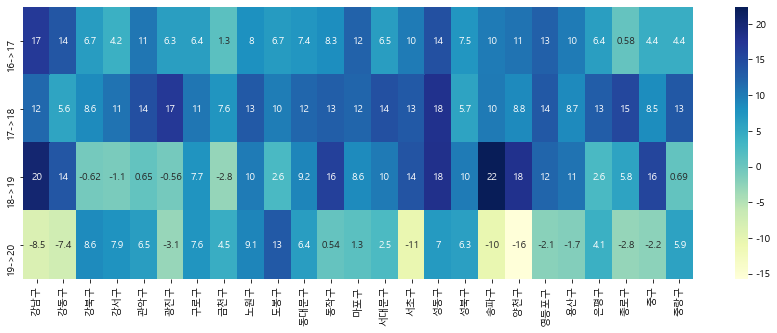

In [15]:
#히트맵 시각화
plt.figure(figsize=(15,5))
sns.heatmap(gu_rate, annot=True, cmap='YlGnBu')

전체적인 상승률을 보기 위해 2016년에서 2020년의 구별 물건금액 상승률을 계산하고 시각화했다. 전반적인 흐름은 위와 동일하게 '상승률 계산해서 list에 저장->dataframe으로 정리->히트맵으로 시각화'이다.

In [16]:
result_total=[]
for i in range(len(group_gu_16)):
    pre=group_gu_16.iloc[i]
    post=group_gu_20.iloc[i]
    result=round((post-pre)/pre*100,3)
    result_total.append(result[1])

result_total

[43.959,
 26.481,
 25.111,
 23.279,
 35.727,
 19.911,
 36.331,
 10.694,
 47.063,
 36.537,
 39.99,
 42.582,
 38.832,
 37.625,
 27.162,
 70.934,
 33.003,
 33.029,
 19.975,
 40.384,
 30.435,
 28.259,
 19.429,
 28.075,
 26.326]

In [17]:
import pandas as pd
gu_names=['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
year=['16->20']
gu_rate_total=pd.DataFrame(result_total,index=gu_names, columns=year)
gu_rate_total

,16->20
강남구,43.959
강동구,26.481
강북구,25.111
강서구,23.279
관악구,35.727
광진구,19.911
구로구,36.331
금천구,10.694
노원구,47.063
도봉구,36.537


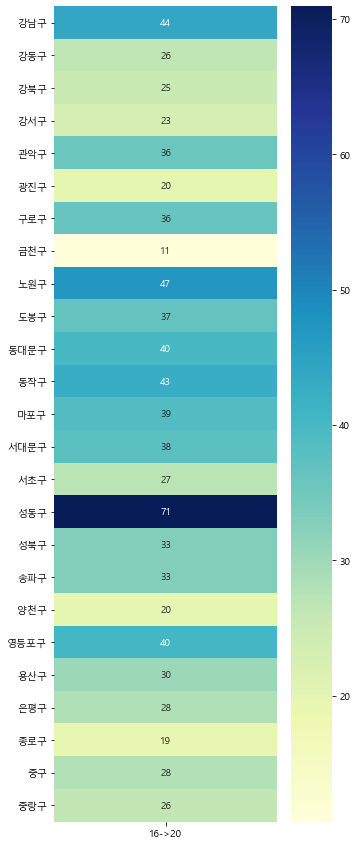

In [18]:
plt.figure(figsize=(5,15))
sns.heatmap(gu_rate_total, annot=True, cmap='YlGnBu')

2020년 자료는 상반기의 신고된 물건금액만 포함하고 있는 것으로 전체 물건금액을 포함하고 있는 기타연도와는 다르다. 따라서 이를 동등한 데이터군으로 여기고 분석하는데에는 한계가 있다고 판단해, 전체적인 흐름을 2016년에서 2019년 물건금액 상승률로 다시 한번 확인하고자 한다. 전반적인 흐름은 위와 동일하게 '상승률 계산해서 list에 저장->dataframe으로 정리->히트맵으로 시각화'이다.

In [19]:
result_total_1619=[]
for i in range(len(group_gu_16)):
    pre=group_gu_16.iloc[i]
    post=group_gu_19.iloc[i]
    result=round((post-pre)/pre*100,3)
    result_total_1619.append(result[1])

result_total_1619

[57.305,
 36.54,
 15.188,
 14.274,
 27.419,
 23.723,
 26.671,
 5.927,
 34.769,
 20.467,
 31.512,
 41.82,
 37.072,
 34.254,
 42.159,
 59.784,
 25.151,
 48.445,
 42.361,
 43.394,
 32.657,
 23.23,
 22.867,
 30.947,
 19.31]

In [20]:
import pandas as pd
gu_names=['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
year=['16->19']
gu_rate_1619=pd.DataFrame(result_total_1619,index=gu_names, columns=year)
gu_rate_1619

,16->19
강남구,57.305
강동구,36.540
강북구,15.188
강서구,14.274
관악구,27.419
광진구,23.723
구로구,26.671
금천구,5.927
노원구,34.769
도봉구,20.467


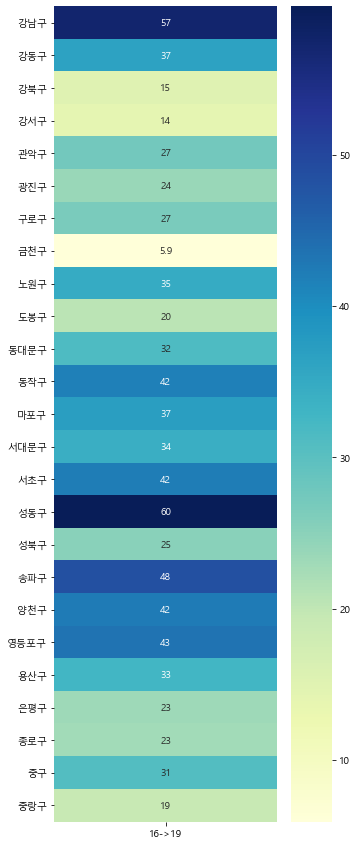

In [21]:
plt.figure(figsize=(5,15))
sns.heatmap(gu_rate_1619, annot=True, cmap='YlGnBu')

# 건물주용도별 물건금액 상승률

다음으로 건물주용도별 물건금액 상승률을 연도별로 구해 dataframe으로 만들고, 이를 히트맵으로 시각화했다. 흐름은 계속 동일하다.

In [22]:
#연도별 부동산 자료를 사용용도별로 그룹화해 새로운 변수에 저장
group_use_16=property16.groupby(['건물주용도']).mean().astype(int)
group_use_17=property17.groupby(['건물주용도']).mean().astype(int)
group_use_18=property18.groupby(['건물주용도']).mean().astype(int)
group_use_19=property19.groupby(['건물주용도']).mean().astype(int)
group_use_20=property20.groupby(['건물주용도']).mean().astype(int)

#for 중첩문을 활용해 연도별 금액상승률을 같은 건물사용용도끼리 매칭해 계산
prelist2=[group_use_16,group_use_17,group_use_18,group_use_19]
postlist2=[group_use_17,group_use_18,group_use_19,group_use_20]
results2=[]
for x,y in zip(prelist2,postlist2):
    newresult2=[]
    for i in range(len(group_use_16)):
        pre=x.iloc[i]
        post=y.iloc[i]
        result=round((post-pre)/pre*100,3)
        newresult2.append(result[1])
    results2.append(newresult2)

print(results2)

[[9.572, 12.343, 8.533, 6.546], [19.402, 9.183, 7.974, 10.713], [10.088, 22.483, 1.985, 0.844], [3.805, -9.801, 2.038, 1.835]]


In [23]:
import pandas as pd
use_names=['단독주택','아파트','연립주택','오피스텔']
year=['16->17','17->18','18->19','19->20']
use_rate=pd.DataFrame(results2,index=year, columns=use_names)
use_rate

,단독주택,아파트,연립주택,오피스텔
16->17,9.572,12.343,8.533,6.546
17->18,19.402,9.183,7.974,10.713
18->19,10.088,22.483,1.985,0.844
19->20,3.805,-9.801,2.038,1.835


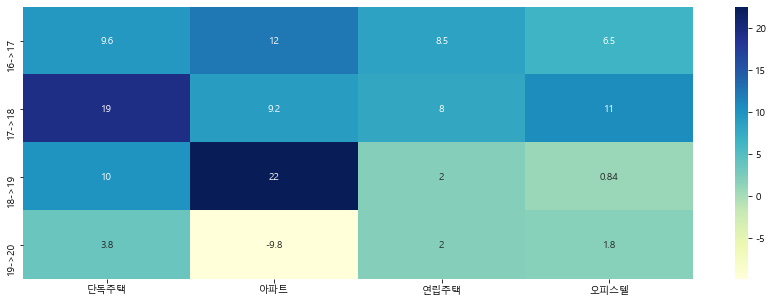

In [24]:
plt.figure(figsize=(15,5))
sns.heatmap(use_rate, annot=True, cmap='YlGnBu')

전체적인 상승률을 보기 위해 2016년에서 2020년의 건물주용도별 물건금액 상승률을 계산하고 시각화했다.

In [25]:
result_total2=[]
for i in range(len(group_use_16)):
    pre=group_use_16.iloc[i]
    post=group_use_20.iloc[i]
    result2=round((post-pre)/pre*100,3)
    result_total2.append(result2[1])

result_total2

[49.509, 35.513, 21.95, 21.138]

In [26]:
import pandas as pd
use_names=['단독주택','아파트','연립주택','오피스텔']
year=['16->20']
use_rate_total=pd.DataFrame(result_total2,index=use_names, columns=year)
use_rate_total

,16->20
단독주택,49.509
아파트,35.513
연립주택,21.950
오피스텔,21.138


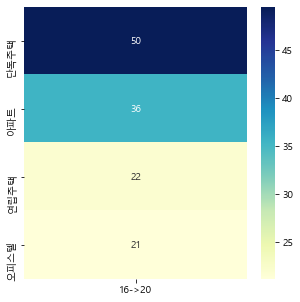

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(use_rate_total, annot=True, cmap='YlGnBu')

위의 구별 상승률 계산과 같은 이유로 2020년 자료는 동등한 데이터군으로 여겨 분석하는데에는 한계가 있다고 판단했ㄷ. 따라서 전체적인 양상을 2016년에서 2019년 물건금액 상승률로 다시 한번 확인하고 시각화했다.

In [28]:
result_1619_2=[]
for i in range(len(group_use_16)):
    pre=group_use_16.iloc[i]
    post=group_use_19.iloc[i]
    result2=round((post-pre)/pre*100,3)
    result_1619_2.append(result2[1])

result_1619_2

[44.029, 50.237, 19.515, 18.955]

In [29]:
import pandas as pd
use_names=['단독주택','아파트','연립주택','오피스텔']
year=['16->19']
use_rate_1619=pd.DataFrame(result_1619_2,index=use_names, columns=year)
use_rate_1619

,16->19
단독주택,44.029
아파트,50.237
연립주택,19.515
오피스텔,18.955


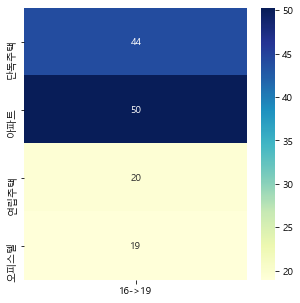

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(use_rate_1619, annot=True, cmap='YlGnBu')

# 구별+건물주용도별 물건금액

마지막으로 전체적인 자치구 및 건물주용도별 물건금액 상승률을 구해 비교해보았다. 우선 필요한 데이터들을 자치구명과 건물주용도 순으로 그룹화해서 새로운 변수에 저장했다. 이후 2016년에서 2020년의 상승률을 구하고, 이와 별개로 좀 더 의미있는 데이터분석을 위해 2016년에서 2019년 상승률을 나타내었다.

In [31]:
group_gu_use_16=property16.groupby(['자치구명','건물주용도']).mean().astype(int)
group_gu_use_19=property19.groupby(['자치구명','건물주용도']).mean().astype(int)
group_gu_use_20=property20.groupby(['자치구명','건물주용도']).mean().astype(int)

2016년에서 2020년 금액상승률을 계산해 시각화한 부분이다.

In [32]:
result_total3=[]
for x in range(25):
    newresult=[]
    for y in range(4):
        i=y+4*x
        pre=group_gu_use_16.iloc[i]
        post=group_gu_use_20.iloc[i]
        result3=round((post-pre)/pre*100,3)
        newresult.append(result3[1])
    result_total3.append(newresult)

result_total3

[[-0.0, 64.24, 15.801, 19.499],
 [30.277, 39.052, 21.19, 29.038],
 [43.675, 41.851, 13.918, 34.647],
 [44.043, 42.442, 20.024, 29.042],
 [34.986, 54.543, 23.81, 6.671],
 [42.734, 59.661, 14.486, -7.7],
 [26.468, 42.294, 24.238, 33.12],
 [50.522, 30.196, 24.193, 33.123],
 [2.945, 51.471, 27.067, 23.912],
 [16.773, 43.788, 19.273, 14.391],
 [55.301, 49.125, 42.086, 23.226],
 [61.881, 55.1, 35.316, 39.909],
 [80.425, 56.515, 27.623, 16.434],
 [36.1, 44.68, 46.051, 23.246],
 [15.422, 45.052, 23.999, 17.088],
 [164.634, 67.43, 61.704, 30.386],
 [22.991, 44.657, 26.906, 23.466],
 [67.407, 64.455, 30.368, 12.482],
 [39.64, 47.695, 17.258, 60.222],
 [50.836, 56.754, 30.642, 33.385],
 [60.349, 49.418, 12.094, 37.209],
 [36.083, 38.991, 42.418, 45.176],
 [17.591, 28.766, 12.156, 18.474],
 [35.208, 34.716, 22.07, 31.857],
 [39.457, 45.112, 15.698, 36.749]]

In [33]:
gu_names=['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
use_names=['단독주택','아파트','연립주택','오피스텔']
gu_use_rate_total=pd.DataFrame(result_total3,index=gu_names, columns=use_names)
gu_use_rate_total

,단독주택,아파트,연립주택,오피스텔
강남구,-0.000,64.240,15.801,19.499
강동구,30.277,39.052,21.190,29.038
강북구,43.675,41.851,13.918,34.647
강서구,44.043,42.442,20.024,29.042
관악구,34.986,54.543,23.810,6.671
광진구,42.734,59.661,14.486,-7.700
구로구,26.468,42.294,24.238,33.120
금천구,50.522,30.196,24.193,33.123
노원구,2.945,51.471,27.067,23.912
도봉구,16.773,43.788,19.273,14.391


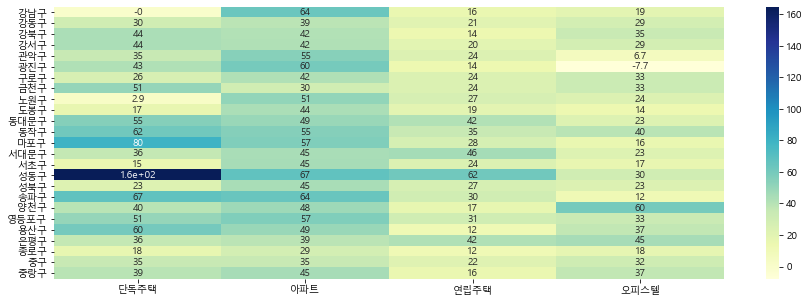

In [34]:
plt.figure(figsize=(15,5))
sns.heatmap(gu_use_rate_total, annot=True, cmap='YlGnBu')

2016년에서 2019년 금액상승률을 계산해 시각화한 부분이다.

In [35]:
result_1619_3=[]
for x in range(25):
    newresult=[]
    for y in range(4):
        i=y+4*x
        pre=group_gu_use_16.iloc[i]
        post=group_gu_use_19.iloc[i]
        result3=round((post-pre)/pre*100,3)
        newresult.append(result3[1])
    result_1619_3.append(newresult)

result_1619_3

[[-0.0, 66.641, 25.581, 18.885],
 [49.874, 44.7, 17.802, 17.991],
 [14.928, 29.755, 20.287, 5.846],
 [37.817, 38.288, 15.812, 26.066],
 [35.291, 40.374, 17.057, 28.745],
 [36.226, 51.659, 10.822, 4.669],
 [24.361, 41.258, 11.033, 21.096],
 [31.881, 27.396, 20.289, 14.686],
 [-3.868, 40.888, 32.504, 8.749],
 [15.034, 32.744, 12.503, 6.505],
 [61.939, 35.588, 35.975, 25.876],
 [54.505, 54.273, 32.988, 26.956],
 [41.356, 53.343, 20.089, 12.914],
 [34.585, 40.055, 38.966, 17.601],
 [15.422, 50.241, 17.159, 13.77],
 [89.639, 59.538, 53.432, 25.29],
 [25.824, 37.069, 20.515, 9.259],
 [53.213, 60.499, 20.539, 18.113],
 [47.599, 54.626, 23.943, 58.097],
 [74.678, 55.607, 25.539, 29.032],
 [45.9, 62.486, 4.628, 16.338],
 [23.173, 30.089, 31.608, 34.095],
 [26.788, 35.058, 10.82, 4.816],
 [71.33, 31.421, 21.611, 25.233],
 [27.311, 34.433, 15.0, 12.946]]

In [36]:
gu_names=['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
use_names=['단독주택','아파트','연립주택','오피스텔']
gu_use_rate_1619=pd.DataFrame(result_1619_3,index=gu_names, columns=use_names)
gu_use_rate_1619

,단독주택,아파트,연립주택,오피스텔
강남구,-0.000,66.641,25.581,18.885
강동구,49.874,44.700,17.802,17.991
강북구,14.928,29.755,20.287,5.846
강서구,37.817,38.288,15.812,26.066
관악구,35.291,40.374,17.057,28.745
광진구,36.226,51.659,10.822,4.669
구로구,24.361,41.258,11.033,21.096
금천구,31.881,27.396,20.289,14.686
노원구,-3.868,40.888,32.504,8.749
도봉구,15.034,32.744,12.503,6.505


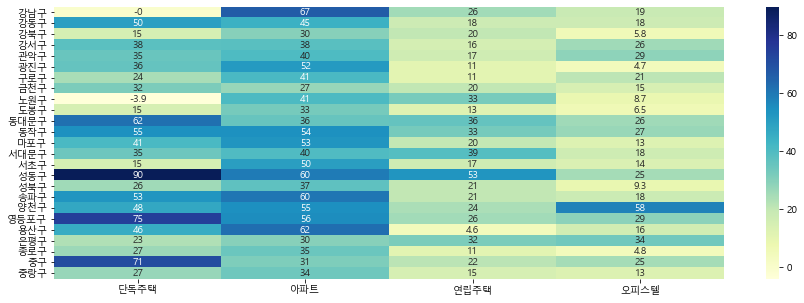

In [37]:
plt.figure(figsize=(15,5))
sns.heatmap(gu_use_rate_1619, annot=True, cmap='YlGnBu')

In [49]:
wage = pd.read_table('report.txt', sep='\t', encoding='utf-8', header=1, index_col=0)
wage.drop('구분', axis=1)

,임금총액,정액급여+초과급여,정액급여,초과급여,특별급여,실질임금
기간,,,,,,
2016,3.4,3.2,3.0,7.9,5.0,2.1
2017,2.8,2.4,2.2,10.6,5.9,0.7
2018,3.1,3.4,3.1,13.3,1.0,1.6
2019,4.0,3.9,3.3,20.2,4.1,3.3
